In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
import pickle
import cv2
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
gpu = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [3]:
! ls /kaggle/input/cityscapes/Cityspaces/images/train/aachen | head

aachen_000000_000019_leftImg8bit.png
aachen_000001_000019_leftImg8bit.png
aachen_000002_000019_leftImg8bit.png
aachen_000003_000019_leftImg8bit.png
aachen_000004_000019_leftImg8bit.png
aachen_000005_000019_leftImg8bit.png
aachen_000006_000019_leftImg8bit.png
aachen_000007_000019_leftImg8bit.png
aachen_000008_000019_leftImg8bit.png
aachen_000009_000019_leftImg8bit.png


In [4]:
!ls /kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen | head

aachen_000000_000019_gtFine_color.png
aachen_000000_000019_gtFine_instanceIds.png
aachen_000000_000019_gtFine_instanceTrainIds.png
aachen_000000_000019_gtFine_labelIds.png
aachen_000000_000019_gtFine_labelTrainIds.png
aachen_000000_000019_gtFine_polygons.json
aachen_000001_000019_gtFine_color.png
aachen_000001_000019_gtFine_instanceIds.png
aachen_000001_000019_gtFine_instanceTrainIds.png
aachen_000001_000019_gtFine_labelIds.png
ls: write error: Broken pipe


In [5]:
train_image_path = "/kaggle/input/cityscapes/Cityspaces/images/train/*/*.png"
train_label_path = "/kaggle/input/cityscapes/Cityspaces/gtFine/train/*/*_gtFine_labelIds.png"
val_image_path = "/kaggle/input/cityscapes/Cityspaces/images/val/*/*.png"
val_label_path = "/kaggle/input/cityscapes/Cityspaces/gtFine/val/*/*_gtFine_labelIds.png"

In [6]:
train_images = sorted(glob.glob(train_image_path))
train_labels = sorted(glob.glob(train_label_path))
val_images = sorted(glob.glob(val_image_path))
val_labels = sorted(glob.glob(val_label_path))

In [7]:
# Check the number of images and labels
print(f"Number of training images: {len(train_images)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of validation images: {len(val_images)}")
print(f"Number of validation labels: {len(val_labels)}")

Number of training images: 2975
Number of training labels: 2975
Number of validation images: 500
Number of validation labels: 500


In [8]:
len(train_images ), len(val_images), len(train_labels), len(val_labels)

(2975, 500, 2975, 500)

In [9]:
# Check if the number of images matches the number of labels
assert len(train_images) == len(train_labels), "Training images and labels count mismatch"
assert len(val_images) == len(val_labels), "Validation images and labels count mismatch"

# Print some pairs to verify
for i in range(5):
#     print(f"Image: {train_images[i]}, Label: {train_labels[i]}")
    print(f"Image: {train_images[i]}")
    print(f"Label: {train_labels[i]}")
    print()

Image: /kaggle/input/cityscapes/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png
Label: /kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png

Image: /kaggle/input/cityscapes/Cityspaces/images/train/aachen/aachen_000001_000019_leftImg8bit.png
Label: /kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen/aachen_000001_000019_gtFine_labelIds.png

Image: /kaggle/input/cityscapes/Cityspaces/images/train/aachen/aachen_000002_000019_leftImg8bit.png
Label: /kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png

Image: /kaggle/input/cityscapes/Cityspaces/images/train/aachen/aachen_000003_000019_leftImg8bit.png
Label: /kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen/aachen_000003_000019_gtFine_labelIds.png

Image: /kaggle/input/cityscapes/Cityspaces/images/train/aachen/aachen_000004_000019_leftImg8bit.png
Label: /kaggle/input/cityscapes/Cityspaces/gtFine/train/aachen/aachen_000004_000

In [10]:
train_images[1000], train_labels[1000], val_images[400], val_labels[400]

('/kaggle/input/cityscapes/Cityspaces/images/train/dusseldorf/dusseldorf_000175_000019_leftImg8bit.png',
 '/kaggle/input/cityscapes/Cityspaces/gtFine/train/dusseldorf/dusseldorf_000175_000019_gtFine_labelIds.png',
 '/kaggle/input/cityscapes/Cityspaces/images/val/munster/munster_000074_000019_leftImg8bit.png',
 '/kaggle/input/cityscapes/Cityspaces/gtFine/val/munster/munster_000074_000019_gtFine_labelIds.png')

In [11]:
print(f"Training Image 1000: {train_images[1000]}")
print(f"Training Label 1000: {train_labels[1000]}")
print(f"Validation Image 400: {val_images[400]}")
print(f"Validation Label 400: {val_labels[400]}")

Training Image 1000: /kaggle/input/cityscapes/Cityspaces/images/train/dusseldorf/dusseldorf_000175_000019_leftImg8bit.png
Training Label 1000: /kaggle/input/cityscapes/Cityspaces/gtFine/train/dusseldorf/dusseldorf_000175_000019_gtFine_labelIds.png
Validation Image 400: /kaggle/input/cityscapes/Cityspaces/images/val/munster/munster_000074_000019_leftImg8bit.png
Validation Label 400: /kaggle/input/cityscapes/Cityspaces/gtFine/val/munster/munster_000074_000019_gtFine_labelIds.png


In [12]:
# Check if the indices exist
if len(train_images) > 1000 and len(train_labels) > 1000:
    print(f"Training Image 1000: {train_images[1000]}")
    print(f"Training Label 1000: {train_labels[1000]}")
else:
    print("Index 1000 is out of range for training images or labels.")

if len(val_images) > 400 and len(val_labels) > 400:
    print(f"Validation Image 400: {val_images[400]}")
    print(f"Validation Label 400: {val_labels[400]}")
else:
    print("Index 400 is out of range for validation images or labels.")

Training Image 1000: /kaggle/input/cityscapes/Cityspaces/images/train/dusseldorf/dusseldorf_000175_000019_leftImg8bit.png
Training Label 1000: /kaggle/input/cityscapes/Cityspaces/gtFine/train/dusseldorf/dusseldorf_000175_000019_gtFine_labelIds.png
Validation Image 400: /kaggle/input/cityscapes/Cityspaces/images/val/munster/munster_000074_000019_leftImg8bit.png
Validation Label 400: /kaggle/input/cityscapes/Cityspaces/gtFine/val/munster/munster_000074_000019_gtFine_labelIds.png


In [13]:
dataset_train = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset_val = tf.data.Dataset.from_tensor_slices((val_images, val_labels))

In [14]:
def read_png(path, channels=3): 
    # path:  image or label path, if image path, channels=3.  if label path, channels=1
    # because in this training, we read label is  gtFine_labelIds.png(channels=1) ,  not _gtFine_color.png
    
    # Read the image file from the given path
    img = tf.io.read_file(path)
    
    # Decode the PNG image. 'channels=3' for RGB images, 'channels=1' for label masks.
    img = tf.image.decode_png(img, channels=channels)
    return img


def crop_img(img, label):
    concat_img = tf.concat([img, label], axis=-1)
    concat_img = tf.image.resize(concat_img, (280, 280), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    crop_img = tf.image.random_crop(concat_img, [256, 256, 4])
    # tf.image.random_crop， crop a tensor to a given size randomly, here is [256, 256, 4]
    # images and labels are cropped at the same time to maintain consistency,  so need to concat([img, label]) 
    return crop_img[:, :, 0:3], crop_img[:, :, 3:]


def normal(img, label):
    img = tf.cast(img, tf.float32)/127.5 -1
    label = tf.cast(label, tf.int32)
    return img, label

In [15]:
def load_image_train(img_path, label_path):
    img = read_png(img_path)
    label = read_png(label_path, channels=1)
    img, label = crop_img(img, label) #size 256x256
    if tf.random.uniform(()) > 0.5:
        img = tf.image.flip_left_right(img)
        label = tf.image.flip_left_right(label)           
    img, label = normal(img, label)
    return img, label

def load_image_val(img_path, label_path):
    
    img = read_png(img_path)
    label = read_png(label_path, channels=1)
    
    img = tf.image.resize(img, (256, 256))
    label = tf.image.resize(label, (256, 256))
    
    img, label = normal(img, label)
    return img, label

In [16]:
index = np.random.permutation(len(train_images))
train_images = np.array(train_images)[index]
train_labels = np.array(train_labels)[index]

In [17]:
BATCH_SIZE = 32
BUFFER_SIZE = 300
EPOCHS = 60  # 1- 60
train_count = len(train_images)
val_count = len(val_images)
train_step_per_epoch = train_count // BATCH_SIZE
val_step_per_epoch = val_count // BATCH_SIZE
auto = tf.data.experimental.AUTOTUNE

In [18]:
print(f"Train Images count is : {train_count}")
print(f"Val Images count is : {val_count}")
print()
print(f"train_step_per_epoch is : {train_step_per_epoch}")
print(f"val_step_per_epoch is : {val_step_per_epoch}")

Train Images count is : 2975
Val Images count is : 500

train_step_per_epoch is : 92
val_step_per_epoch is : 15


In [19]:
dataset_train = dataset_train.map(load_image_train, num_parallel_calls=auto)
dataset_val =dataset_val.map(load_image_val, num_parallel_calls=auto)

dataset_train = dataset_train.cache().repeat().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(auto)
dataset_val = dataset_val.cache().batch(BATCH_SIZE)

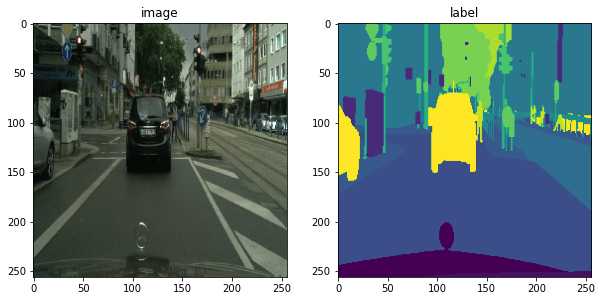

In [20]:
for image, label in dataset_train.take(1):
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.title('image')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image[0]))
    plt.subplot(122)
    plt.title('label')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(label[0])) 

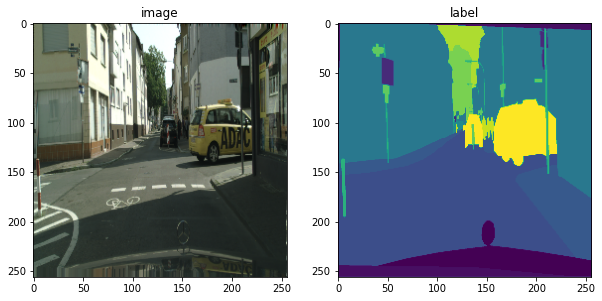

In [21]:
for image, label in dataset_val.take(1):

    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.title('image')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image[0]))
    plt.subplot(122)
    plt.title('label')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(label[0])) 

In [22]:
#tf.keras.backend.clear_session()


In [23]:
def create_model():
    inputs = tf.keras.layers.Input(shape=(256, 256, 3))
    
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)    
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
 
    #   x shape  (None, 256, 256, 64)
    x1 = tf.keras.layers.MaxPooling2D(padding='same')(x)
    # (None, 128, 128, 64)
    
    x1 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)    
    x1 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x1)
    x1 = tf.keras.layers.BatchNormalization()(x1)
    #  shape  (None, 128, 128, 128)
        
    x2 = tf.keras.layers.MaxPooling2D(padding='same')(x1)
    # shape (None, 64, 64, 128)
    
    x2 = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)    
    x2 = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x2)
    x2 = tf.keras.layers.BatchNormalization()(x2)
    #  shape  (None, 64, 64, 256)  
    
    x3 = tf.keras.layers.MaxPooling2D(padding='same')(x2)
    #  shape  (None, 32, 32, 256) 
    
    x3 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)    
    x3 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x3)
    x3 = tf.keras.layers.BatchNormalization()(x3)
    #  shape  (None, 32, 32, 512)  
    
    x4 = tf.keras.layers.MaxPooling2D(padding='same')(x3)
    #  shape  (None, 16, 16, 512) 
    
    x4 = tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu')(x4)
    x4 = tf.keras.layers.BatchNormalization()(x4)    
    x4 = tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu')(x4)
    x4 = tf.keras.layers.BatchNormalization()(x4)
    #  shape  (None, 16, 16, 1024)    
    
    x5 = tf.keras.layers.Conv2DTranspose(512, 2, strides=2, padding='same',
                                        activation='relu')(x4)
    x5 = tf.keras.layers.BatchNormalization()(x5)
    #  shape  (None, 32, 32, 512)
#     print("x3, x5 shape:", x3.shape, x5.shape)
    x6 = tf.concat([x3, x5], axis=-1)
    #  shape  (None, 32, 32, 1024)
    
    x6 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x6)
    x6 = tf.keras.layers.BatchNormalization()(x6)    
    x6 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x6)
    x6 = tf.keras.layers.BatchNormalization()(x6)
    #    (None, 32, 32, 512)
    
    x7 = tf.keras.layers.Conv2DTranspose(256, 2, strides=2, padding='same',
                                        activation='relu')(x6)
    x7 = tf.keras.layers.BatchNormalization()(x7)
    #  shape  (None, 64, 64, 256)
#     print("x2, x7 shape:", x2.shape, x7.shape)
    x8 = tf.concat([x2, x7], axis=-1)
    #   (None, 64, 64, 512)
    
    
    x8 = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x8)
    x8 = tf.keras.layers.BatchNormalization()(x8)    
    x8 = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x8)
    x8 = tf.keras.layers.BatchNormalization()(x8)
    #    (None, 64, 64, 256)
    
    x9 = tf.keras.layers.Conv2DTranspose(128, 2, strides=2, padding='same',
                                        activation='relu')(x8)
    x9 = tf.keras.layers.BatchNormalization()(x9)
    #   (None, 128, 128, 128)
#     print("x1, x9 shape:", x1.shape, x9.shape)
    x10 = tf.concat([x1, x9], axis=-1)
    #   (None, 128, 128, 256)
    
    x10 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x10)
    x10 = tf.keras.layers.BatchNormalization()(x10)    
    x10 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x10)
    x10 = tf.keras.layers.BatchNormalization()(x10)
    #    (None, 128, 128, 128)  
    
    
    x11= tf.keras.layers.Conv2DTranspose(64, 2, strides=2, padding='same',
                                        activation='relu')(x10)
    x11 = tf.keras.layers.BatchNormalization()(x11)
    #   (None, 256, 256, 64)   和 x shape一样
#     print("x, x11 shape:", x.shape, x11.shape)
    x11 = tf.concat([x, x11], axis=-1)
    #   (None, 256, 256, 128) 
    
    x12 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x11)
    x12 = tf.keras.layers.BatchNormalization()(x12)    
    x12 = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x12)
    x12 = tf.keras.layers.BatchNormalization()(x12)
    #    (None, 256, 256, 64) 
    
    output = tf.keras.layers.Conv2D(34, 1, padding='same', activation='softmax')(x12)
    #   (None, 256, 256, 34) , 
    
    return tf.keras.Model(inputs=inputs, outputs=output)

In [24]:
model = create_model()

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       batch_normalization[0][0]        
______________________________________________________________________________________________

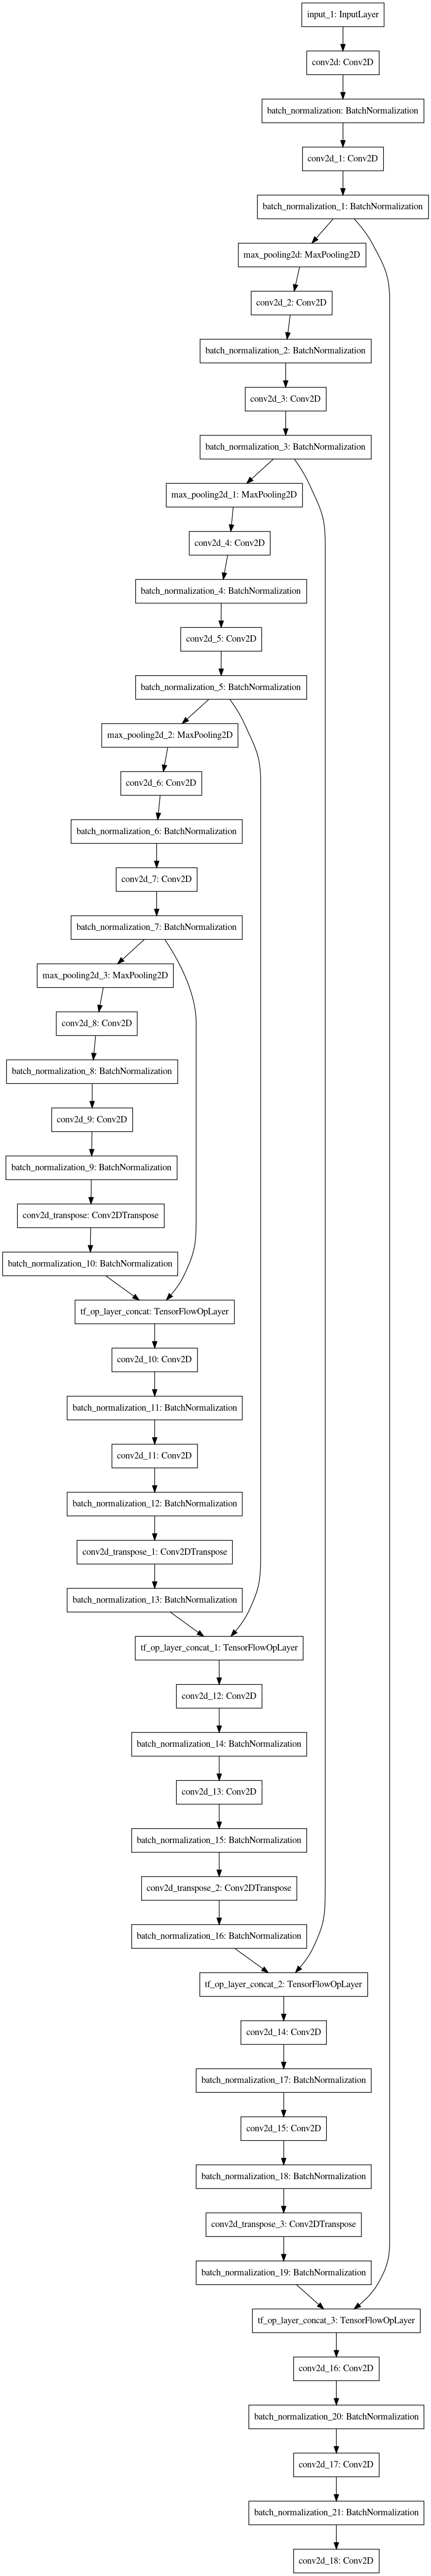

In [26]:
tf.keras.utils.plot_model(model, to_file='model.png')

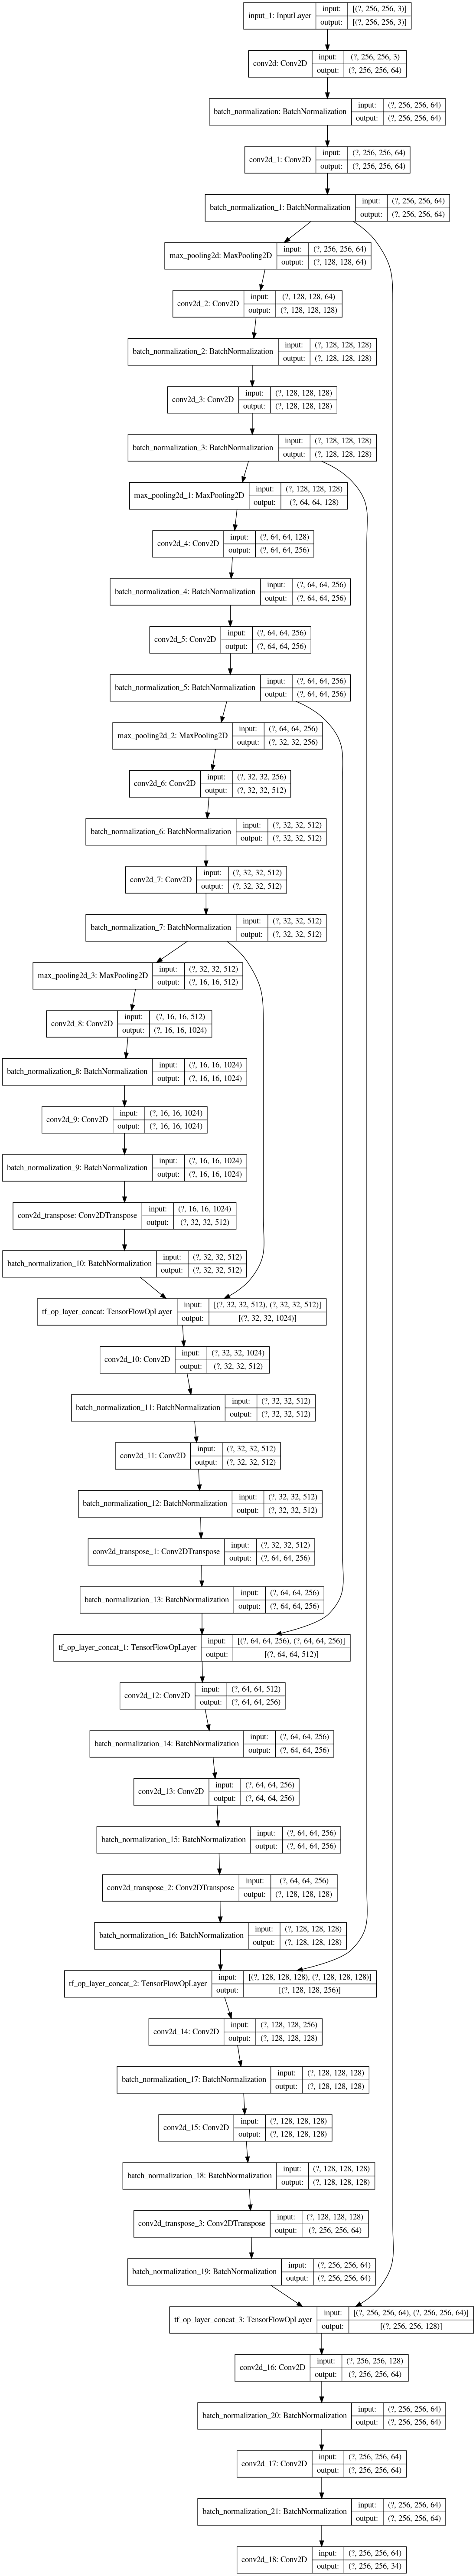

In [27]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')

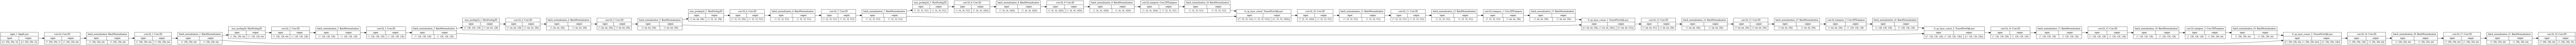

In [28]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')

In [29]:
#tf.keras.metrics.MeanIoU(34)   #tf.keras.metrics.MeanIoU(num_classes)
class MeanIoU(tf.keras.metrics.MeanIoU):
#     def __call__(self, y_true, y_pred, sample_weight=None):
#         y_pred = tf.argmax(y_pred, axis=-1)
#         return super().__call__(y_true, y_pred, sample_weight=sample_weight)
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=-1)
        return super().update_state(y_true, y_pred, sample_weight)

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc',
                                                                                MeanIoU(num_classes=34)])

In [31]:
dataset_train, dataset_val

(<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.int32)>)

In [32]:
start = time.time()
history = model.fit(dataset_train, epochs=EPOCHS, 
                   steps_per_epoch=train_step_per_epoch,
                   validation_steps=val_step_per_epoch,
                   validation_data=dataset_val)
end =time.time()
print(str(int(end - start)))

Epoch 1/60
92/92 [==============================] - 158s 2s/step - loss: 1.2486 - acc: 0.6904 - mean_io_u: 0.1073 - val_loss: 5.2861 - val_acc: 0.1275 - val_mean_io_u: 0.0126
Epoch 2/60
92/92 [==============================] - 99s 1s/step - loss: 0.8520 - acc: 0.7671 - mean_io_u: 0.1404 - val_loss: 6.8295 - val_acc: 0.3510 - val_mean_io_u: 0.0215
Epoch 3/60
92/92 [==============================] - 99s 1s/step - loss: 0.7370 - acc: 0.7976 - mean_io_u: 0.1615 - val_loss: 7.8441 - val_acc: 0.3061 - val_mean_io_u: 0.0180
Epoch 4/60
92/92 [==============================] - 99s 1s/step - loss: 0.6716 - acc: 0.8156 - mean_io_u: 0.1782 - val_loss: 3.2354 - val_acc: 0.4254 - val_mean_io_u: 0.0339
Epoch 5/60
92/92 [==============================] - 99s 1s/step - loss: 0.6355 - acc: 0.8244 - mean_io_u: 0.1910 - val_loss: 2.4886 - val_acc: 0.5567 - val_mean_io_u: 0.0587
Epoch 6/60
92/92 [==============================] - 99s 1s/step - loss: 0.6049 - acc: 0.8317 - mean_io_u: 0.1996 - val_loss: 1.29

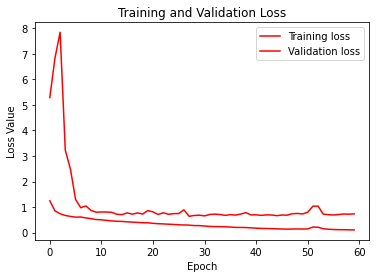

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

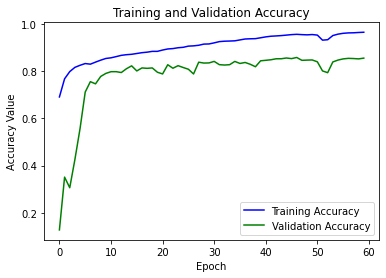

In [34]:
# Retrieve accuracy and validation accuracy from history
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

# Plot accuracy and validation accuracy
plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

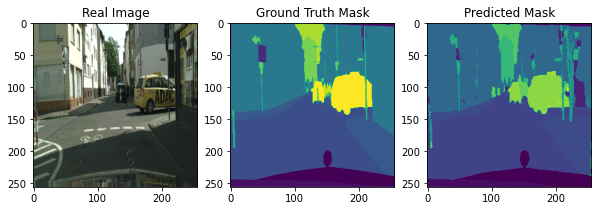

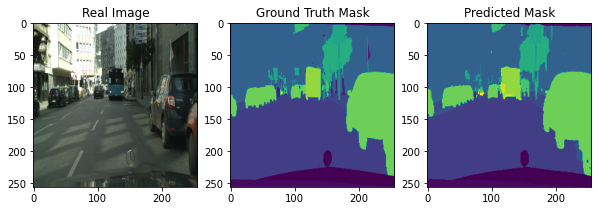

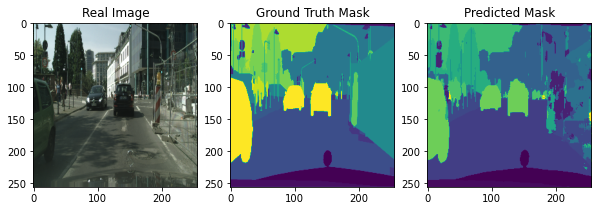

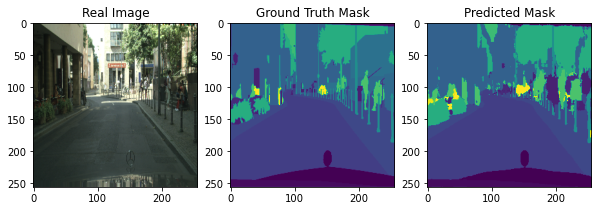

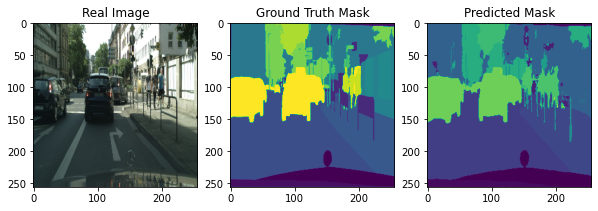

In [35]:
for image, label in dataset_val.take(5):
    # Predict on a batch of images
    pred_mask = model.predict(image)
    
    # Convert predictions to class labels
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]

    # Plot the results for the first image in the batch
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.title("Real Image")
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image[0]))
    
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(tf.keras.preprocessing.image.array_to_img(label[0]))
    
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[0]))

    plt.show()

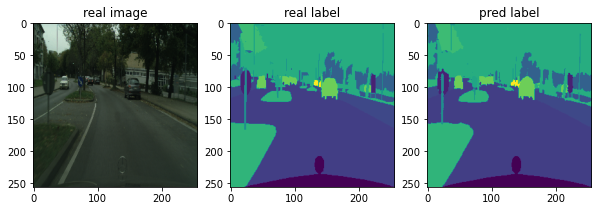

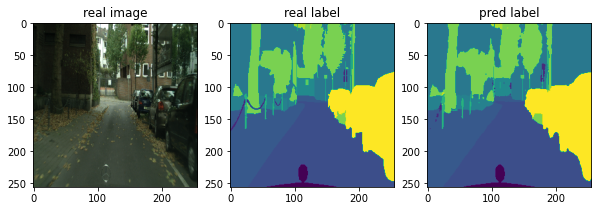

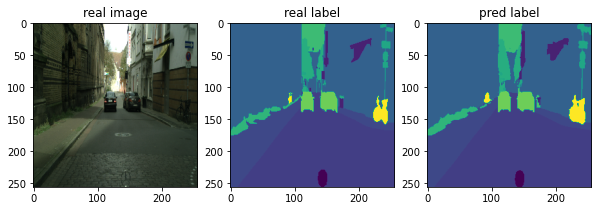

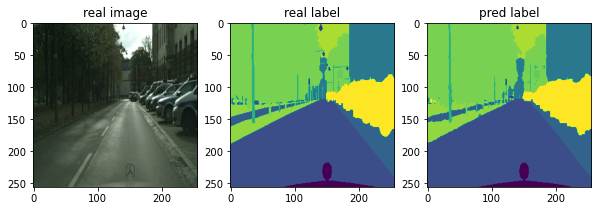

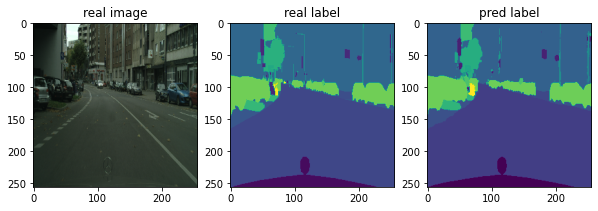

In [36]:
for image, mask in dataset_train.take(5):
    pred_mask = model.predict(image)
    
    # Convert predictions to class labels
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]

    # Plot the results for the first image in the batch
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.title('real image')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(image[0]))
    
    plt.subplot(1, 3, 2)
    plt.title('real label')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[0]))
    
    plt.subplot(1, 3, 3)
    plt.title('pred label')
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[0]))

    plt.show()

In [37]:
# for image, mask in dataset_train.take(5):
#     pred_mask = model.predict(image)
#     pred_mask = tf.argmax(pred_mask, axis=-1)
#     pred_mask = pred_mask[..., tf.newaxis]
    
#     plt.figure(figsize=(10, 10))
#     for i in range(num):
#         plt.subplot(num, 3, i*num+1)
#         plt.title('real image')
#         plt.imshow(tf.keras.preprocessing.image.array_to_img(image[i]))
#         plt.subplot(num, 3, i*num+2)
#         plt.title('real label')
#         plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[i]))
#         plt.subplot(num, 3, i*num+3)
#         plt.title('pred label')
#         plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[i]))

In [38]:
# model.save('unet_v7.h5')
model.save('my_segmentation_model.h5')

In [39]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('my_segmentation_model.h5', custom_objects={'MeanIoU': MeanIoU})  # If you've used a custom metric

In [40]:
def preprocess_image(image_path):
    # Read and decode the image
    image = read_png(image_path)
    
    # Resize the image to the size expected by the model
    image = tf.image.resize(image, (256, 256))
    
    # Normalize the image (this should match how you normalized the training data)
    image = tf.cast(image, tf.float32) / 127.5 - 1
    
    # Add batch dimension (model expects input of shape (batch_size, 256, 256, 3))
    image = tf.expand_dims(image, axis=0)  # Shape: (1, 256, 256, 3)
    
    return image

In [41]:
def predict_image(model, image_path):
    # Preprocess the image
    image = preprocess_image(image_path)
    
    # Make the prediction
    pred_mask = model.predict(image)
    
    # Convert the prediction to class labels (choose the class with the highest probability)
    pred_mask = tf.argmax(pred_mask, axis=-1)
    
    # Reshape the predicted mask to (256, 256, 1) and remove batch dimension
    pred_mask = pred_mask[..., tf.newaxis]
    pred_mask = tf.squeeze(pred_mask, axis=0)
    
    return pred_mask

In [42]:
def plot_prediction(image_path, pred_mask):
    # Load and preprocess the original image
    original_image = read_png(image_path)
    original_image = tf.image.resize(original_image, (256, 256))

    # Plot the original image and the predicted mask
    plt.figure(figsize=(10, 10))
    
    # Display the original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(tf.keras.preprocessing.image.array_to_img(original_image))

    # Display the predicted mask
    plt.subplot(1, 2, 2)
    plt.title("Predicted Mask")
    plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask))
    
    plt.show()

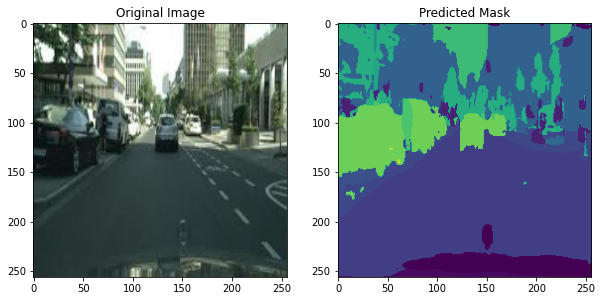

In [43]:
# Path to the test image
test_image_path = '/kaggle/input/cityspace-test/cityspace4.jpg'

# Run prediction
predicted_mask = predict_image(model, test_image_path)

# Plot the original image and the predicted mask
plot_prediction(test_image_path, predicted_mask)